# Data visualization techniques using matplotlib and seaborn

Hello! In this notebook I intend to present different plotting techniques using the house prices dataset. I am using the seaborn library, which provides a high-level interface to matplotlib. Moreover, although the main goal here is to introduce the main aspects of the library, I will also show how to custom stuff that are not very common or found in online tutorial.

I will not provide details about the dataset's attributes along the path, but you can find the full description here. Also, I will use pandas for data manipulation and numpy to make some log transformations when necessary, you can find the code for that in the utils.py file.

## Contents:
- General plots
    - Histogram
    - Box plot
    - Bar plot
    - Scatter plot
    - Line plot
    - Heatmap
- Multi-plot grids
    - Subplots
    - Pairplots
    - FacetGrid
- Custom techniques
    - Seaborn and matplotlib default
    - Personal customize

## Reading data

Notice that I already am reading the categorical and numerical data separately. Let's start the analysis using numerical data only!

In [25]:
import utils
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

data, cat_cols, num_cols = utils.read_data(return_type_cols=True)
print(data.head())

    MSSubClass MSZoning  LotArea Street LotShape LandContour Utilities  \
Id                                                                       
1           60       RL     8450   Pave      Reg         Lvl    AllPub   
2           20       RL     9600   Pave      Reg         Lvl    AllPub   
3           60       RL    11250   Pave      IR1         Lvl    AllPub   
4           70       RL     9550   Pave      IR1         Lvl    AllPub   
5           60       RL    14260   Pave      IR1         Lvl    AllPub   

   LotConfig LandSlope Neighborhood  ... EnclosedPorch 3SsnPorch ScreenPorch  \
Id                                   ...                                       
1     Inside       Gtl      CollgCr  ...             0         0           0   
2        FR2       Gtl      Veenker  ...             0         0           0   
3     Inside       Gtl      CollgCr  ...             0         0           0   
4     Corner       Gtl      Crawfor  ...           272         0           0   
5

In [26]:
data.describe().loc[['min', 'max', 'mean', 'std'], :]

,MSSubClass,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,BsmtFinSF1,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,...,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SalePrice
min,20.000000,1300.000000,1.000000,1.000000,1872.000000,1950.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,2006.000000,34900.000000
max,190.000000,215245.000000,10.000000,9.000000,2010.000000,2010.000000,5644.000000,1474.000000,2336.000000,6110.000000,...,857.000000,547.000000,552.000000,508.000000,480.000000,738.000000,15500.000000,12.000000,2010.000000,755000.000000
mean,56.897260,10516.828082,6.099315,5.575342,1971.267808,1984.865753,443.639726,46.549315,567.240411,1057.429452,...,94.244521,46.660274,21.954110,3.409589,15.060959,2.758904,43.489041,6.321918,2007.815753,180921.195890
std,42.300571,9981.264932,1.382997,1.112799,30.202904,20.645407,456.098091,161.319273,441.866955,438.705324,...,125.338794,66.256028,61.119149,29.317331,55.757415,40.177307,496.123024,2.703626,1.328095,79442.502883


## Histograms

Histograms are usually employed to evaluate the data distribution. In the following plot, we can visualize the distribution of the SalePrice column.

<AxesSubplot:xlabel='SalePrice', ylabel='Count'>

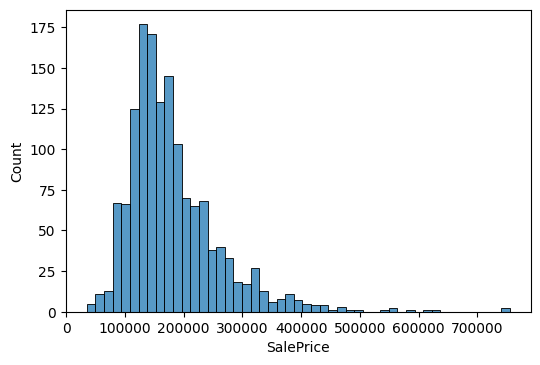

In [27]:
plt.figure(figsize=(6, 4), dpi=100)
sns.histplot(x='SalePrice', data=data)

Notice that it presents a long tail distribution. As for data visualization as for data cleaning, it is always interesting manipulate the data as a normal distribution. We can easily accomplish it by applying a log transformation. Note: for undoing this transformation, apply the np.exp function.

<AxesSubplot:xlabel='SalePrice', ylabel='Count'>

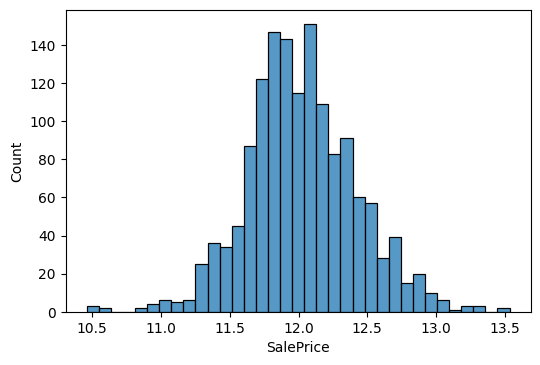

In [28]:
plt.figure(figsize=(6, 4), dpi=100)
data.SalePrice = data.SalePrice.apply(np.log)
sns.histplot(x='SalePrice', data=data)

## Boxplot

This is an alternative technique to evaluate data distribution. Let's see. how the SalePrice column is distributed over each class of the OverallQual column.

We can notice that as bigger the OverallQual value, the higher is the overall SalePrice distribution.

<AxesSubplot:xlabel='OverallQual', ylabel='SalePrice'>

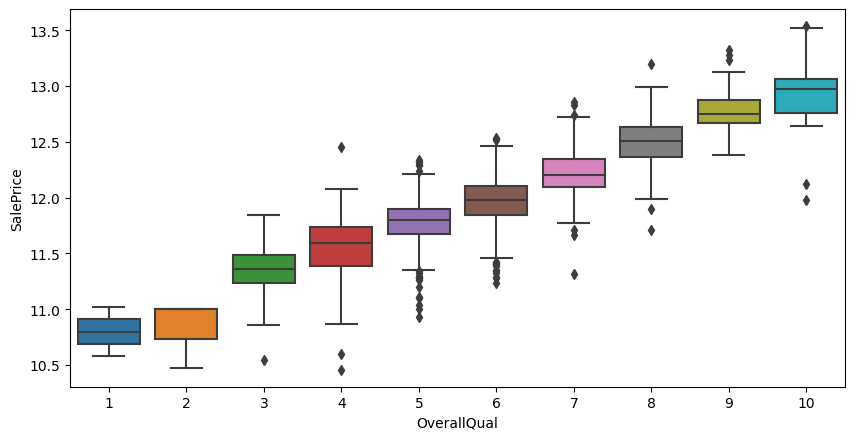

In [85]:
plt.figure(figsize=(10, 5), dpi=100)
sns.boxplot(x='OverallQual', y='SalePrice', data=data)

Alternatively, we can use the violinplot or the swarmplot with the same purposes.

<AxesSubplot:xlabel='OverallQual', ylabel='SalePrice'>

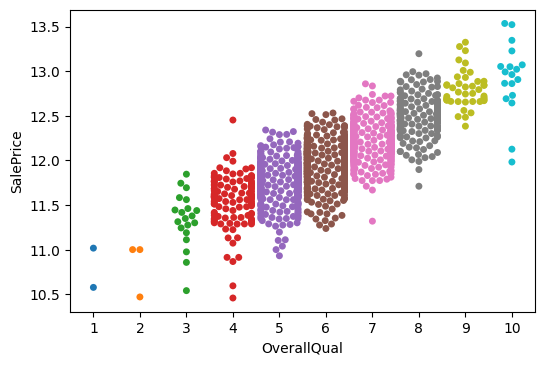

In [86]:
plt.figure(figsize=(6, 4), dpi=100)
# sns.violinplot(x='OverallQual', y='SalePrice', data=data)
sns.swarmplot(x='OverallQual', y='SalePrice', data=data)

## Barplot

Using the previous example, we can also visualize those columns using barplots. However, when we are evaluating the distribution of a certain column, this technique is not the best approach.

<AxesSubplot:xlabel='OverallQual', ylabel='SalePrice'>

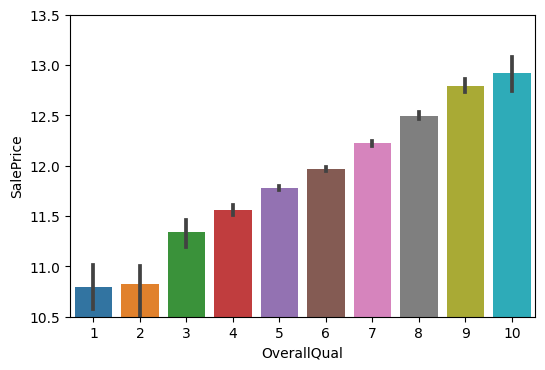

In [90]:
plt.figure(figsize=(6, 4), dpi=100)
plt.ylim(10.5, 13.5)
sns.barplot(x='OverallQual', y='SalePrice', data=data)

Another example of barplots, let's count the number of occurrences of each category in the Neighborhood column. 

Obs: Notice that sometimes I may use some particular methods, not realted to the plot technique, such as the rotation in this example, but I intend to further explain these tricks.

<AxesSubplot:xlabel='Name', ylabel='Neighborhood'>

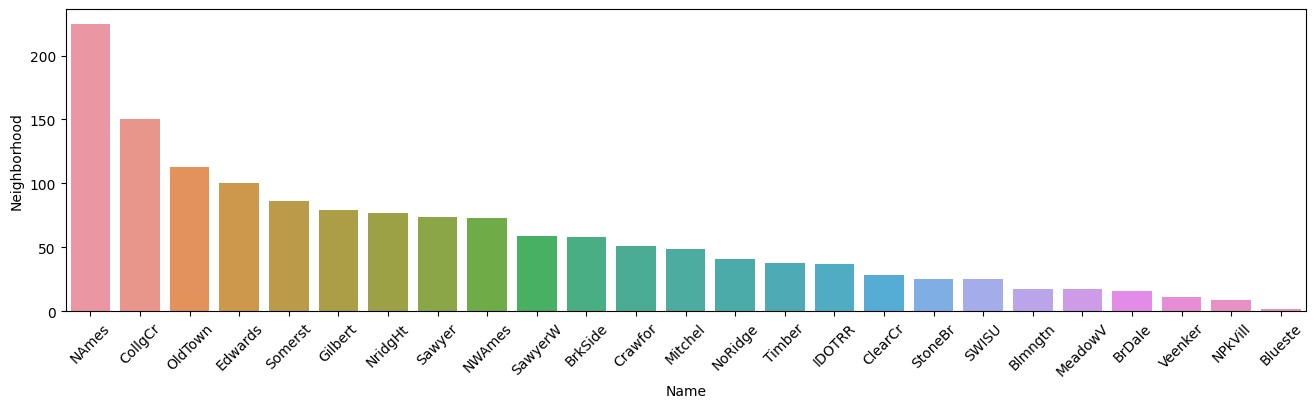

In [112]:
neigh_count = data.Neighborhood.value_counts().to_frame().reset_index().rename(columns={'index': 'Name'})

plt.figure(figsize=(16, 4), dpi=100)
plt.xticks(rotation=45)
sns.barplot(x='Name', y='Neighborhood', data= neigh_count)

## Scatter plot

This techinque is frequently employed to find correlations between two attributes. Let's start by analysing if the SalePrice column has any relation with the LotArea column. Before that, let's first apply a log transformation over LotArea column too.

<AxesSubplot:xlabel='SalePrice', ylabel='LotArea'>

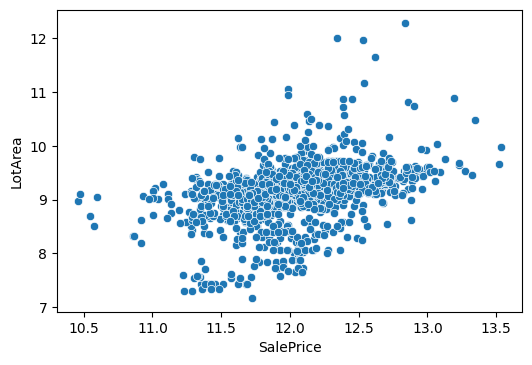

In [29]:
plt.figure(figsize=(6, 4), dpi=100)
data.LotArea = data.LotArea.apply(np.log)
sns.scatterplot(x='SalePrice', y='LotArea', data=data)

We can estimate this slightly relation by employing a linear regression model. Seaborn provides the method regplot that allows us to perform it.

<AxesSubplot:xlabel='SalePrice', ylabel='LotArea'>

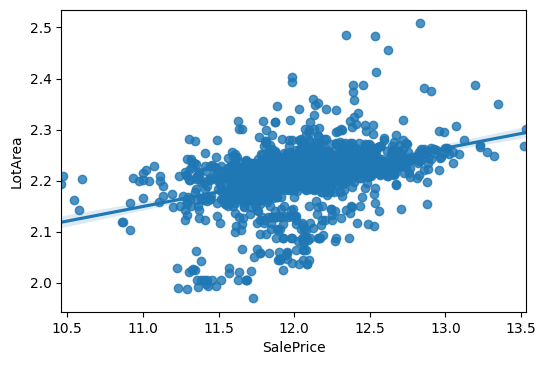

In [30]:
plt.figure(figsize=(6, 4), dpi=100)
data.LotArea = data.LotArea.apply(np.log)
sns.regplot(x='SalePrice', y='LotArea', data=data)

We can also add a third column in order to group this data. In the next example we use the ExterQual column to understand how data is behaving.

Obersving the plot we can conclude that, in general, when ExterQual is 'Ex', the overall SalePrice is higher. Also, when ExterQual is 'Fa', the LotArea is smaller and the SalePrice is lower.

<AxesSubplot:xlabel='SalePrice', ylabel='LotArea'>

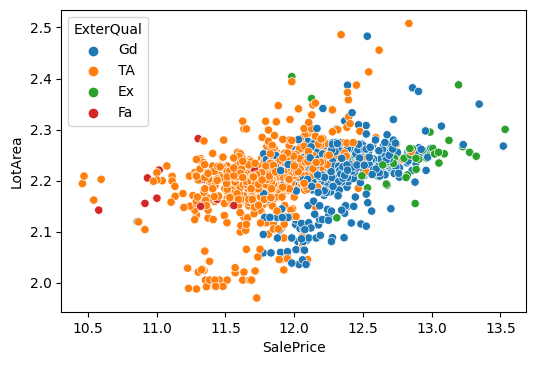

In [31]:
plt.figure(figsize=(6, 4), dpi=100)
sns.scatterplot(x='SalePrice', y='LotArea', hue='ExterQual', data=data)

## Line plot

As an example of line plot, we will visualize how the average Sale Price has behaved over the YrSold column.

<AxesSubplot:xlabel='YrSold', ylabel='SalePrice'>

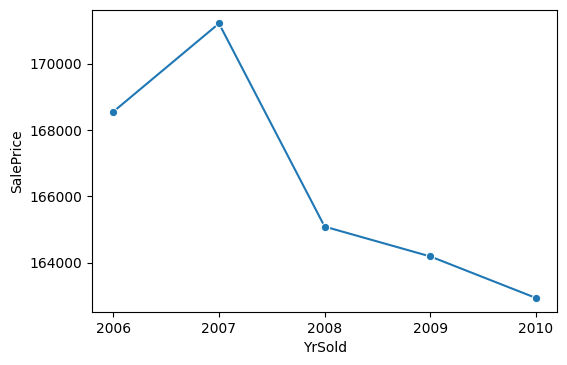

In [70]:
group_by_year = data.groupby('YrSold').SalePrice.mean().to_frame().reset_index()
group_by_year.SalePrice = group_by_year.SalePrice.apply(np.exp)
group_by_year.YrSold = group_by_year.YrSold.astype('str')

plt.figure(figsize=(6, 4), dpi=100)
sns.lineplot(x='YrSold', y='SalePrice', data=group_by_year, marker='o')

## Heatmaps

Heatmaps are frequently employed for visualizing correlation among columns. Notice that the correlation includes only numerical columns.

<AxesSubplot:>

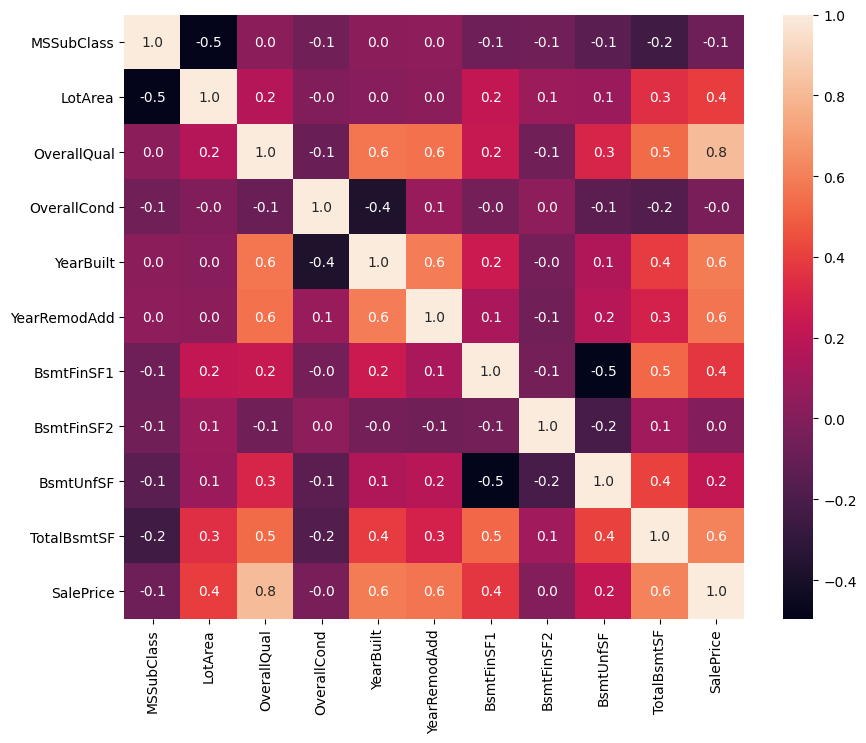

In [126]:
cols = np.append(num_cols[:10], 'SalePrice')

plt.figure(figsize=(10, 8), dpi=100)
sns.heatmap(data[cols].corr(), annot=True, fmt='.1f')

## ToDo: multi-plots and custom techniques